# Scipy

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Use LU decomposition to solve Ax=b

Create a random 5x5 matrix

In [2]:
n = 5
A = np.random.rand(n,n)
print(A)

[[0.42136653 0.58766794 0.69640911 0.85929222 0.13879303]
 [0.13867191 0.07135341 0.38223327 0.81327558 0.58694051]
 [0.12152891 0.20889957 0.59706783 0.96836622 0.63486811]
 [0.01411333 0.23891877 0.67485534 0.87367643 0.65440989]
 [0.64115294 0.15944711 0.30957624 0.21749559 0.75564074]]


Compute its LU factorization (see also [scipy.linalg.lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html))

In [3]:
lu,piv = la.lu_factor(A)

Create a right hand side vector

In [4]:
b = np.random.rand(n)

Solve A x = b

In [5]:
x = la.lu_solve((lu,piv),b)
print(x)

[-23.49441465  73.36639331 -61.22346106   7.55622661  27.65218019]


Check that x solves the problem

In [6]:
print(A@x-b)

[-6.10622664e-15  2.10942375e-15 -2.55351296e-15  2.88657986e-15
 -1.55431223e-15]


If we do not want the LU decomposition, we can directly solve, which uses LAPACK 

In [7]:
y = la.solve(A,b)
print(y)

[-23.49441465  73.36639331 -61.22346106   7.55622661  27.65218019]


## Sparse matrix

Scipy provides methods that can work on sparse matrices, see [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

Sparse matrix formats are provided by

 * [csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html)
 * [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)
 
 csc_matrix stores the entries column-wise, csr_matrix stores them row-wise.

In [8]:
from scipy.sparse import csc_matrix, csr_matrix
A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


In [9]:
A = csr_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (0, 1)	2.0
  (1, 0)	1.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


We can construct sparse matrix by giving indices and values

In [10]:
row = np.array([0, 0, 1, 1, 2, 2])
col = np.array([0, 1, 0, 1, 1, 2])
data = np.array([3.0, 2.0, 1.0, -1.0, 5.0, 1.0])
A = csc_matrix((data, (row, col)), shape=(3, 3))
print(A.todense())

[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


## Curve fitting

Suppose we are given some data set $(x_i,y_i)$, $i=0,1,...,n-1$ and we suspect there is a linear relation ship between them
$$
y = a + b x
$$
But possibly the data also has some noise. Let us generate such a data set.

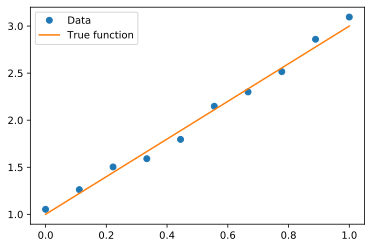

In [11]:
a = 1.0
b = 2.0
n = 10
x = np.linspace(0,1,n)
ye = a + b*x
# Add some noise
y = ye + 0.1*(2*np.random.rand(n)-1)
plt.plot(x,y,'o',x,ye)
plt.legend(('Data','True function'))

Define the function we want to fit. The first argument is the independent variable, and remaining are the parameters that we want to find.

In [12]:
def f(x,a,b):
    return a + b*x

We can use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function from scipy to do the fitting.

Fitted parameters =  1.0003886937419701 2.0240937343715655


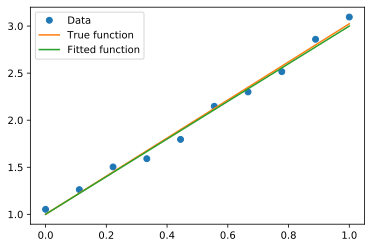

In [13]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
print('Fitted parameters = ',*popt)
plt.plot(x,y,'o',x,f(x,*popt),x,ye)
plt.legend(('Data','True function','Fitted function'))